In [159]:
import numpy as np 
import pandas as pd
from pathlib import Path
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import json

In [160]:
dset_path = '../gazecapture'
p = Path('../gazecapture/')

def get_json(i, fn): 
    j_fp = p / i / fn
    with open(j_fp) as f: return json.load(f)
def frame_data(i): return get_json(i, 'frames.json')    
def get_eye_info(i): return get_json(i, 'appleLeftEye.json'), get_json(i, 'appleRightEye.json')
def get_face_info(i): return get_json(i, 'appleFace.json')
def get_facegrid(i): return get_json(i, 'faceGrid.json')

In [161]:
df = pd.read_csv('traindf_sample.csv')

In [4]:
df.head()

,Unnamed: 0,file_names,XCam,YCam
0,25275,01775/frames/00294.jpg,-0.534992,-3.585655
1,26279,02846/frames/00584.jpg,1.064000,-10.475254
2,7493,01693/frames/00775.jpg,1.938750,-9.467451
3,20335,00548/frames/00250.jpg,-1.633093,-2.069367
4,19063,00509/frames/00649.jpg,6.884427,-10.892500


In [172]:
fn = df['file_names'][3]
imagen = fn[fn.index('/0')+1:]
im = cv2.imread('{}/{}'.format(dset_path, fn))
shape = im.shape

# Adding Noise To The Image Excluding the Face

In [173]:
case = fn[:fn.index('/')]
LE, RE = get_eye_info(case)
faced = get_face_info(case)
fdata = frame_data(case)
fgdata = get_facegrid(case)
index = fdata.index(imagen)

## Using Bounding Box Data

1

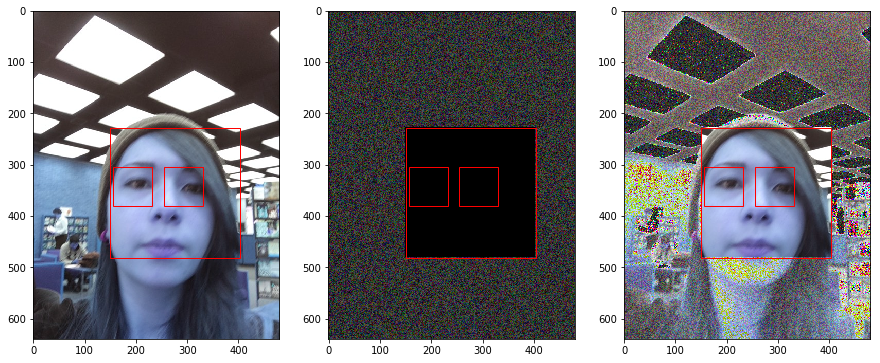

In [207]:
# get data
lh, lw, lx, ly = LE['H'][index], LE['W'][index], LE['X'][index], LE['Y'][index]
rh, rw, rx, ry = RE['H'][index], RE['W'][index], RE['X'][index], RE['Y'][index]
fh, fw, fx, fy = faced['H'][index], faced['W'][index], faced['X'][index], faced['Y'][index]

# extra noisy to see results
noise = np.random.randint(100, size = im.shape, dtype = 'uint8')
noise[int(fy):int(fy+fh), int(fx):int(fx+fw), :] = 0
noisy_im = im + noise

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(im)
ax2.imshow(noise)
ax3.imshow(noisy_im)
for ax in [ax1, ax2, ax3]:
    ax.add_patch(patches.Rectangle((fx, fy), fw, fh, linewidth=1,edgecolor='r',facecolor='none'))
    ax.add_patch(patches.Rectangle((fx+lx, fy+ly), lw, lh, linewidth=1,edgecolor='r',facecolor='none'))
    ax.add_patch(patches.Rectangle((fx+rx, fy+ry), rw, rh, linewidth=1,edgecolor='r',facecolor='none'))

fgdata['IsValid'][index]

## Using FaceGrid Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1

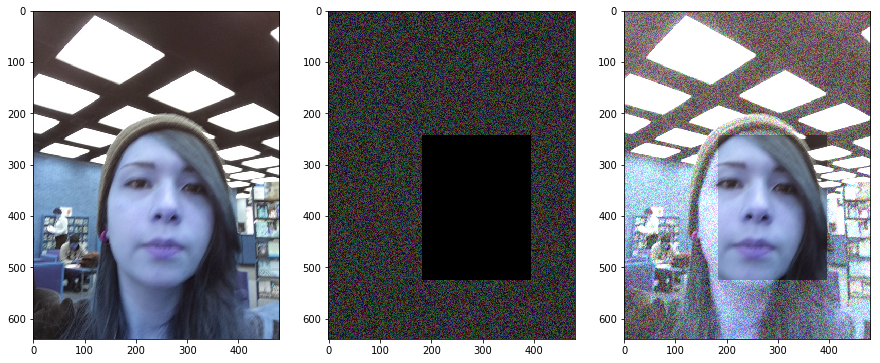

In [210]:
fgx, fgy, fgw, fgh = fgdata['X'][index], fgdata['Y'][index], fgdata['W'][index], fgdata['H'][index]

# extra noisy to see results
noise = np.random.randint(100, size = im.shape, dtype = 'uint8')

# face grid is given by 25x25 grid
temp = np.ones((25, 25, 3))
temp[fgx:fgx+fgw, fgy:fgy+fgh, :] = [0, 0, 0]
tempre = cv2.resize(temp, (shape[1], shape[0]))

# remove noise from facegrid
noise = noise * tempre.astype(int)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(im)
ax2.imshow(noise)
ax3.imshow(noise + im)

fgdata['IsValid'][index]